In [288]:
%matplotlib notebook
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [289]:
df = pd.read_csv("new_train.csv", header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 18 columns):
Homepage              10466 non-null float64
Homepage _Duration    10466 non-null float64
Aboutus               10466 non-null float64
Aboutus_Duration      10466 non-null float64
Contactus             10466 non-null float64
Contactus_Duration    10466 non-null float64
BounceRates           10466 non-null float64
ExitRates             10466 non-null float64
PageValues            10480 non-null float64
SpecialDay            10480 non-null float64
Month                 10480 non-null int64
OperatingSystems      10480 non-null int64
Browser               10480 non-null int64
Province              10480 non-null int64
TrafficType           10480 non-null int64
VisitorType           10480 non-null int64
Weekend               10480 non-null int64
Revenue               10480 non-null int64
dtypes: float64(10), int64(8)
memory usage: 1.4 MB


In [290]:
df=df.dropna()

In [291]:

a=['Homepage', 'Homepage _Duration', 'Aboutus', 'Aboutus_Duration',
       'Contactus', 'Contactus_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Province', 'TrafficType', 'VisitorType', 'Weekend']

X = df[a]
y = df['Revenue']
y.shape

(10466,)

In [292]:
from sklearn import preprocessing
X = preprocessing.scale(X)

In [339]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state=42)

In [340]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2

In [341]:
model = Sequential()
model.add(Dense(128, activation="relu", input_shape = (x_train.shape[1],))) # Hidden Layer 1 that receives the Input from the Input Layer

model.add(Dense(64, kernel_regularizer=l2(0.001),bias_regularizer=l2(0.01), activation="relu")) # Hidden Layer 2
model.add(Dropout(0.2))

model.add(Dense(32, kernel_regularizer=l2(0.001),bias_regularizer=l2(0.01) ,activation="relu")) # Hidden Layer 3
model.add(Dropout(0.2))

# model.add(Dense(16, kernel_regularizer=l2(0.001),bias_regularizer=l2(0.01),activation="relu")) # Hidden Layer 4
# # model.add(Dropout(0.2))


model.add(Dense(1, activation="sigmoid")) # Outout Layer

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 128)               2304      
_________________________________________________________________
dense_124 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_47 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_125 (Dense)            (None, 32)                2080      
_________________________________________________________________
dropout_48 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_126 (Dense)            (None, 1)                 33        
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [342]:
model.compile(optimizer='adam', loss = "binary_crossentropy", metrics = ['accuracy'])

In [343]:
history=model.fit(x_train, y_train,validation_split=0.33, batch_size = 64, epochs = 20)

Train on 5609 samples, validate on 2763 samples
Epoch 1/20
5609/5609 [==============================] - 2s 397us/step - loss: 0.5103 - acc: 0.8417 - val_loss: 0.3942 - val_acc: 0.8802
Epoch 2/20
5609/5609 [==============================] - 0s 36us/step - loss: 0.3825 - acc: 0.8891 - val_loss: 0.3586 - val_acc: 0.8889
Epoch 3/20
5609/5609 [==============================] - 0s 36us/step - loss: 0.3506 - acc: 0.8943 - val_loss: 0.3342 - val_acc: 0.8947
Epoch 4/20
5609/5609 [==============================] - 0s 39us/step - loss: 0.3290 - acc: 0.8927 - val_loss: 0.3222 - val_acc: 0.8947
Epoch 5/20
5609/5609 [==============================] - 0s 36us/step - loss: 0.3139 - acc: 0.8959 - val_loss: 0.3089 - val_acc: 0.8961
Epoch 6/20
5609/5609 [==============================] - 0s 33us/step - loss: 0.3009 - acc: 0.8980 - val_loss: 0.2967 - val_acc: 0.9012
Epoch 7/20
5609/5609 [==============================] - 0s 34us/step - loss: 0.2890 - acc: 0.9012 - val_loss: 0.2928 - val_acc: 0.8940
Epoch 

In [344]:
test_loss, test_acc = model.evaluate(x_validation, y_validation)

2094/2094 [==============================] - 0s 47us/step


In [345]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8920725881768731


In [337]:
print('Test lost:', test_loss)

Test lost: 0.2848896065018992


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<IPython.core.display.Javascript object>


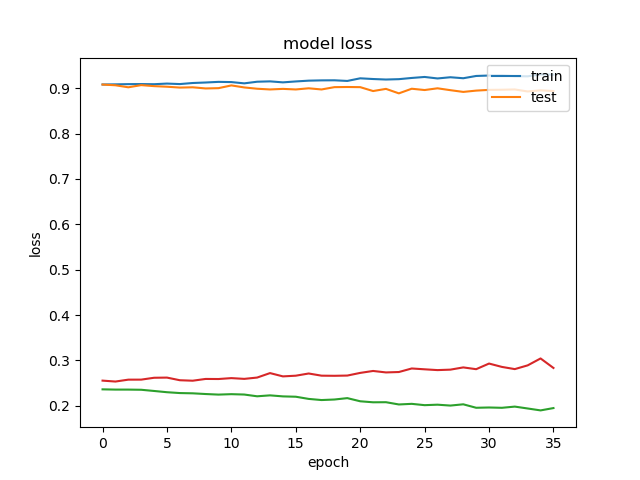

In [338]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [346]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [347]:
logisticRegr.fit(x_train, y_train)

/home/shashimal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [348]:
logisticRegr.predict(x_validation)

array([0, 0, 0, ..., 0, 0, 0])

In [349]:
score = logisticRegr.score(x_validation, y_validation)

In [350]:
print (score)

0.8815663801337154


In [351]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [353]:
y_pred = svclassifier.predict(x_validation)